In [ ]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

connect = duckdb.connect("sakila.duckdb")

In [96]:
#a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

movies_longer_than_3h = connect.sql("""
    SELECT title, length 
    FROM sakila.film WHERE length > 180


""").df()

movies_longer_than_3h

,title,length
0,ANALYZE HOOSIERS,181
1,BAKED CLEOPATRA,182
2,CATCH AMISTAD,183
3,CHICAGO NORTH,185
4,CONSPIRACY SPIRIT,184
5,CONTROL ANTHEM,185
6,CRYSTAL BREAKING,184
7,DARN FORRESTER,185
8,FRONTIER CABIN,183
9,GANGS PRIDE,185


In [97]:
#b) Which movies have the word "love" in its title?

titles_with_word_love = connect.sql("""
    SELECT title, rating, length, description
    FROM sakila.film 
    WHERE title ILIKE '%love%';

""").df()

titles_with_word_love

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [ ]:
#c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length


shortest_length = connect.sql("""
    SELECT 
    MIN(length) AS shortest_length
    FROM sakila.film;

""").df()

average_length = connect.sql("""
    SELECT 
    AVG(length) AS average_length
    FROM sakila.film;
""").df()

median_length_operation = connect.sql("""
    SELECT length
    FROM sakila.film;
""").df()
median_length = median_length_operation["length"].median()

longest_length = connect.sql("""
    SELECT MAX(length) AS max_length
    FROM sakila.film;
""").df()

In [53]:
shortest_length

,shortest_length
0,46


In [54]:
average_length

,average_length
0,115.272


In [117]:
print(f"median film length:{median_length}")

median film length:114.0


In [75]:
longest_length

,max_length
0,185


In [101]:
#d) The Manager wants to know the 10 most expensive movies to rent per day.

top_10_most_expensive_movies_per_day = connect.sql("""
    SELECT title, rental_duration, rental_rate, rental_rate / rental_duration AS rent_per_day
    FROM sakila.film
    ORDER BY rent_per_day DESC
    LIMIT 10;
""").df()

In [102]:
top_10_most_expensive_movies_per_day

,title,rental_duration,rental_rate,rent_per_day
0,AMERICAN CIRCUS,3,4.99,1.663333
1,BACKLASH UNDEFEATED,3,4.99,1.663333
2,BILKO ANONYMOUS,3,4.99,1.663333
3,BEAST HUNCHBACK,3,4.99,1.663333
4,CARIBBEAN LIBERTY,3,4.99,1.663333
5,AUTUMN CROW,3,4.99,1.663333
6,CASPER DRAGONFLY,3,4.99,1.663333
7,ACE GOLDFINGER,3,4.99,1.663333
8,BEHAVIOR RUNAWAY,3,4.99,1.663333
9,CASUALTIES ENCINO,3,4.99,1.663333


In [103]:
#e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have played in.


actors_with_most_movies = connect.sql(""" 
    
    SELECT actor.actor_id, actor.first_name, actor.last_name, COUNT(film_actor.film_id) AS number_of_films
    FROM sakila.actor
    JOIN sakila.film_actor
    ON film_actor.actor_id = actor.actor_id
                       
    GROUP BY 
    actor.first_name, actor.last_name, actor.actor_id
    ORDER BY number_of_films DESC
    LIMIT 10;

                       
""").df() 


actors_with_most_movies


,actor_id,first_name,last_name,number_of_films
0,107.0,GINA,DEGENERES,42
1,102.0,WALTER,TORN,41
2,198.0,MARY,KEITEL,40
3,181.0,MATTHEW,CARREY,39
4,23.0,SANDRA,KILMER,37
5,81.0,SCARLETT,DAMON,36
6,158.0,VIVIEN,BASINGER,35
7,37.0,VAL,BOLGER,35
8,144.0,ANGELA,WITHERSPOON,35
9,60.0,HENRY,BERRY,35


In [ ]:
#f) Now it's time for you to choose your own question to explore the sakila database!

#top 5 categories with most content

top5_categories = connect.sql("""
SELECT category.name, COUNT(film_category.film_id) AS amount_of_films
FROM sakila.category
JOIN sakila.film_category
ON category.category_id = film_category.category_id

GROUP BY category.name
ORDER BY amount_of_films DESC
LIMIT 5;


""").df()

top5_categories

,name,amount_of_films
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66


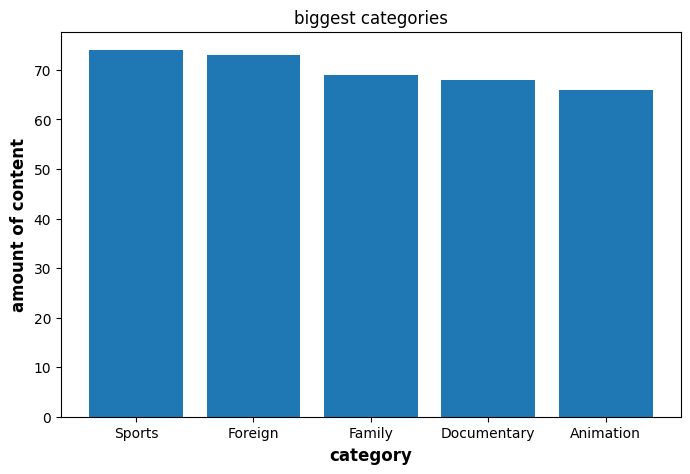

In [114]:
plt.figure(figsize=(8,5))
plt.bar(
    top5_categories["name"],
    top5_categories["amount_of_films"]
)
plt.title("biggest categories")
plt.xlabel("category", fontsize=12, fontweight="semibold")
plt.ylabel("amount of content", fontsize=12, fontweight="semibold")
plt.show()

In [ ]:
#top 3 customers with most orders/payments 

top3customers = connect.sql("""
    SELECT first_name, COUNT(payment.payment_id) AS amount_of_orders
    FROM sakila.customer
    JOIN sakila.payment                 
    ON payment.customer_id = customer.customer_id
    GROUP BY customer.customer_id, first_name
    ORDER BY amount_of_orders DESC
    LIMIT 3;
""").df()

top3customers

,first_name,amount_of_orders
0,ELEANOR,46
1,KARL,45
2,CLARA,42


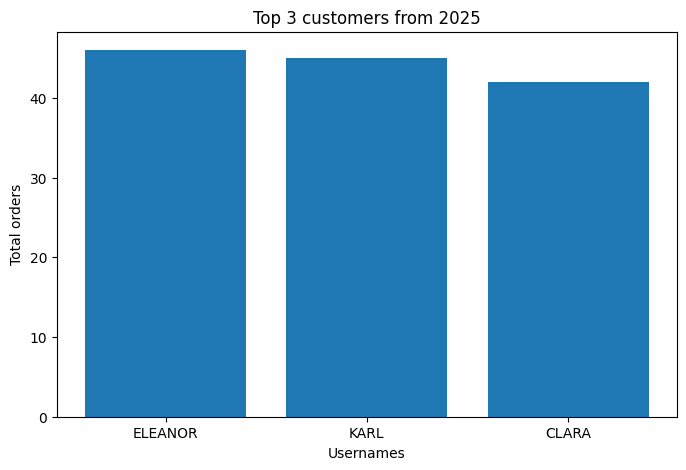

In [113]:
plt.figure(figsize=(8,5))
plt.bar(
    top3customers["first_name"],
    top3customers["amount_of_orders"]
)
plt.title("Top 3 customers from 2025")
plt.xlabel("Usernames")
plt.ylabel("Total orders")
plt.show()

In [ ]:
#top 5 most rented movies

most_rented_movies = connect.sql("""

SELECT film.title, COUNT(rental.rental_id) AS number_of_rentals
FROM sakila.film

JOIN sakila.inventory
ON film.film_id = inventory.film_id
JOIN sakila.rental
ON inventory.inventory_id = rental.inventory_id

GROUP BY film.title
ORDER BY number_of_rentals DESC
LIMIT 5;
""").df()

most_rented_movies

,title,number_of_rentals
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,JUGGLER HARDLY,32
3,SCALAWAG DUCK,32
4,FORWARD TEMPLE,32


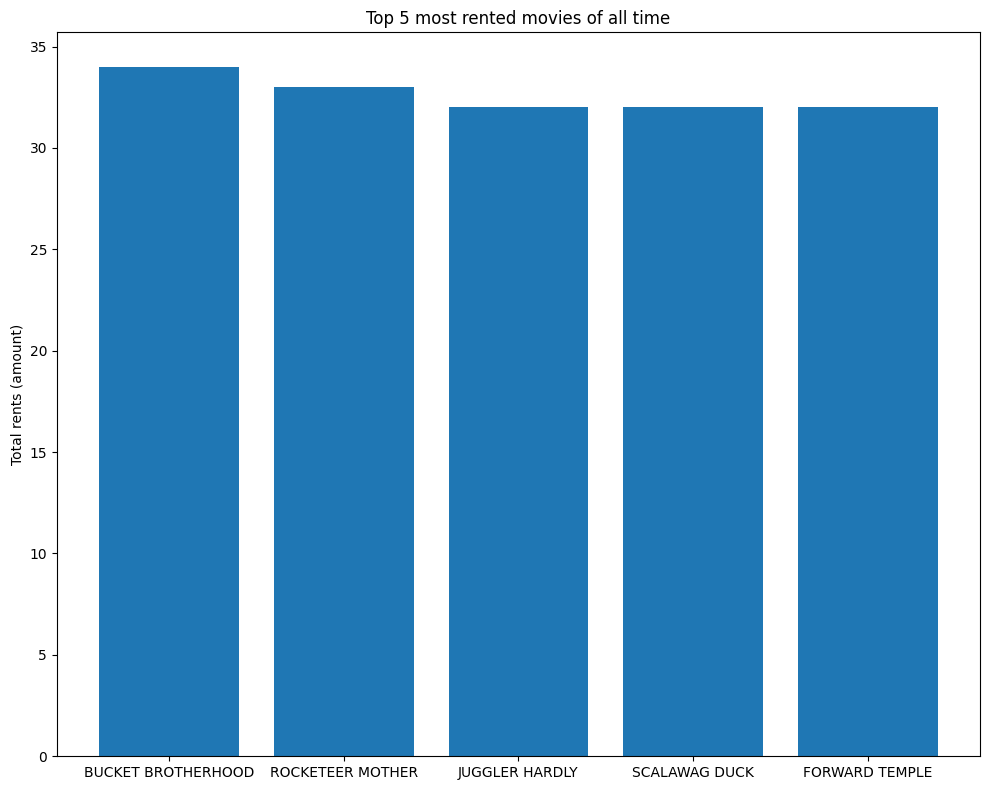

In [116]:
plt.figure(figsize=(10,8))
plt.bar(
    most_rented_movies["title"],
    most_rented_movies["number_of_rentals"]
)
plt.title("Top 5 most rented movies of all time")
plt.ylabel("Total rents (amount)")
plt.tight_layout()
plt.show()

In [ ]:
#a) Who are our top 5 customers by total spend?

top5_customers_by_total_spend = connect.sql("""
SELECT first_name, SUM(payment.amount) AS total_spend
FROM sakila.customer

JOIN sakila.payment
ON customer.customer_id = payment.customer_id

GROUP BY customer.customer_id, customer.first_name
ORDER BY total_spend DESC
LIMIT 5;
""").df()
top5_customers_by_total_spend

,first_name,total_spend
0,KARL,221.55
1,ELEANOR,216.54
2,CLARA,195.58
3,MARION,194.61
4,RHONDA,194.61


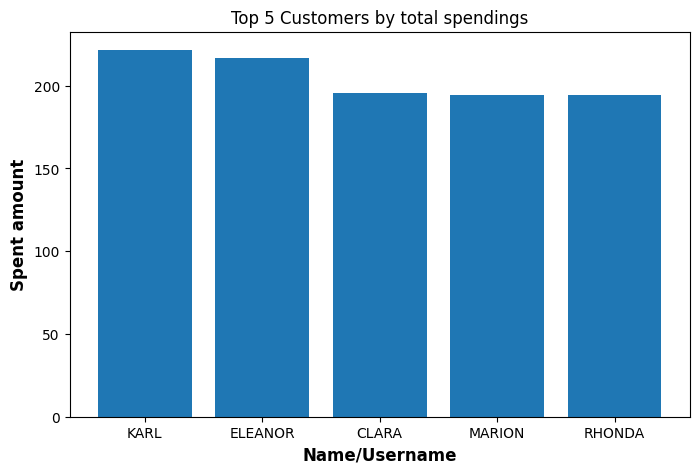

In [111]:
plt.figure(figsize=(8,5))
plt.bar(
    top5_customers_by_total_spend["first_name"],
    top5_customers_by_total_spend["total_spend"]
)
plt.title("Top 5 Customers by total spendings")
plt.xlabel("Name/Username", fontsize=12, fontweight="semibold")
plt.ylabel("Spent amount", fontsize=12, fontweight="semibold")
plt.show()

In [109]:
#b) How much money does each film category bring in?

category_revenue = connect.sql("""
SELECT category.name, SUM(payment.amount) AS total_revenue
FROM sakila.category

JOIN sakila.film_category
ON category.category_id = film_category.category_id
JOIN sakila.film 
ON film_category.film_id = film.film_id
JOIN sakila.inventory 
ON film.film_id = inventory.film_id
JOIN sakila.rental 
ON inventory.inventory_id = rental.inventory_id
JOIN sakila.payment
ON rental.rental_id = payment.rental_id

GROUP BY category.name
ORDER BY total_revenue DESC;

""").df()

category_revenue

,name,total_revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


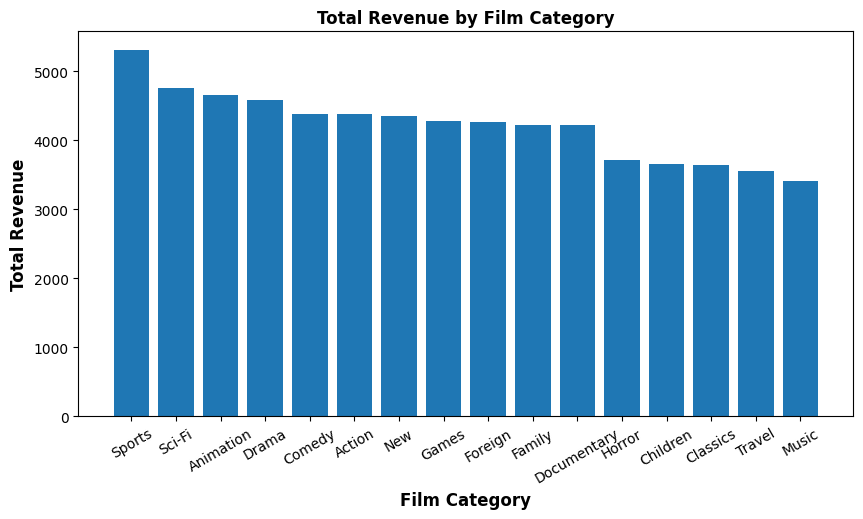

In [110]:
plt.figure(figsize=(10,5))
plt.bar(
    category_revenue["name"],
    category_revenue["total_revenue"]
)

plt.title("Total Revenue by Film Category", fontsize=12, fontweight="bold")
plt.xlabel("Film Category", fontsize=12, fontweight="semibold")
plt.ylabel("Total Revenue", fontsize=12, fontweight="semibold")
#plt.tight_layout()
plt.xticks(rotation=30)

plt.show()